# EDA of Titanic dataset

# Importing Liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset

In [4]:
data = pd.read_csv(r'C:\Users\USER\Downloads\train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA

# Q1: Dimensions of dataset

In [5]:
dimension = data.shape
dimension

(891, 12)

# Q2: Column names

In [6]:
column_names=data.columns
column_names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Q3: Missing values of dataset

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Q4: Data types of the column

In [8]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Q5: Summary Statistics of dataset

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Q6: Correlation between different columns

In [13]:
# First, identify non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns

# Convert non-numeric columns to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, columns=non_numeric_columns)

# Now, you should have a DataFrame with only numerical values
# You can compute the correlation matrix
correlation_matrix = data_encoded.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.052129,0.039227,-0.021633,...,-0.009220,-0.049263,-0.030733,0.043137,-0.008206,-0.060049,-0.013814,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.026456,-0.026456,0.042470,...,-0.037436,0.033803,0.073642,-0.026456,0.060095,0.016040,-0.026456,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.027734,0.027734,0.027734,...,0.039243,-0.021469,-0.021469,0.027734,-0.017519,0.055561,-0.052496,-0.243292,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.031735,-0.035342,0.013676,...,-0.028110,-0.070995,-0.003128,NaN,-0.099305,-0.077296,0.039474,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.015907,0.014507,0.014507,...,-0.022508,0.007576,-0.027582,-0.015907,0.063564,-0.001402,-0.015907,-0.059528,-0.026354,0.070941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cabin_G6,-0.060049,0.016040,0.055561,-0.077296,-0.001402,0.072388,-0.025180,-0.002251,-0.002251,-0.002251,...,-0.003185,-0.003903,-0.003903,-0.002251,-0.003185,1.000000,-0.002251,-0.032371,-0.020654,0.041589
Cabin_T,-0.013814,-0.026456,-0.052496,0.039474,-0.015907,-0.015878,0.002224,-0.001124,-0.001124,-0.001124,...,-0.001590,-0.001948,-0.001948,-0.001124,-0.001590,-0.002251,1.000000,-0.016158,-0.010310,0.020759
Embarked_C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,-0.016158,-0.016158,-0.016158,...,-0.022864,-0.028018,-0.028018,-0.016158,-0.022864,-0.032371,-0.016158,1.000000,-0.148258,-0.778359
Embarked_Q,-0.033606,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.010310,-0.010310,-0.010310,...,-0.014588,-0.017877,-0.017877,0.108986,-0.014588,-0.020654,-0.010310,-0.148258,1.000000,-0.496624


# Q7: Outliers in dataset

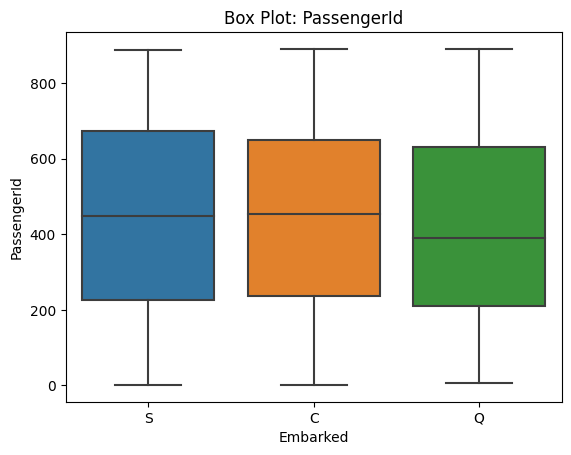

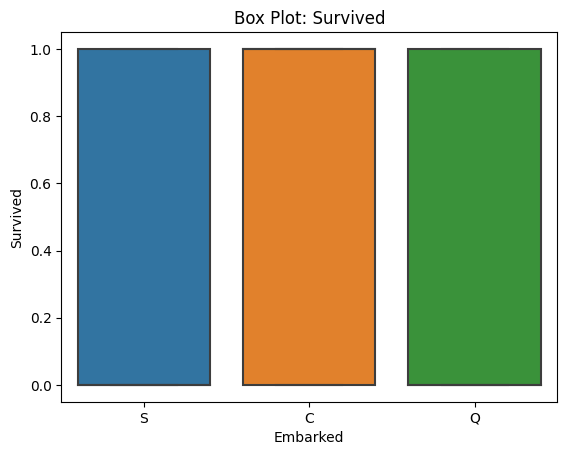

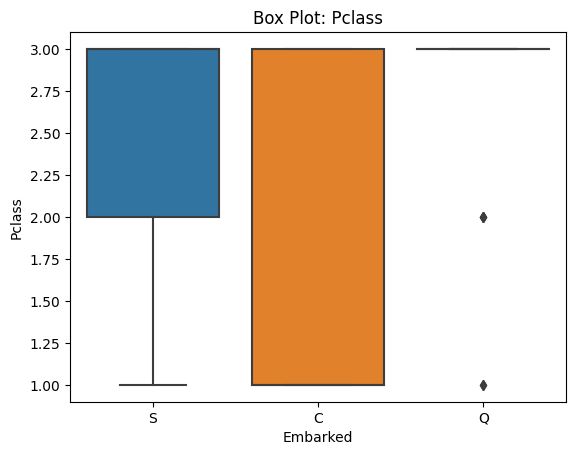

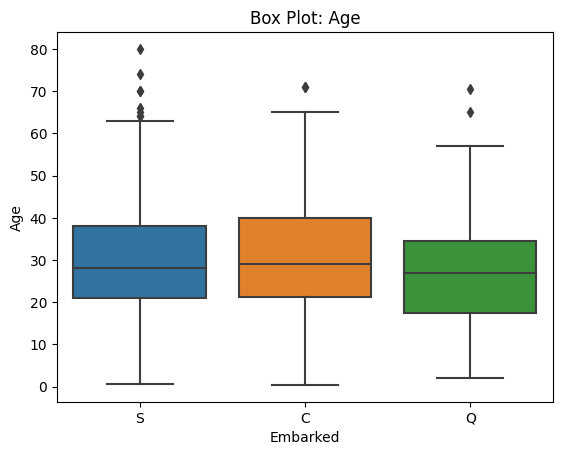

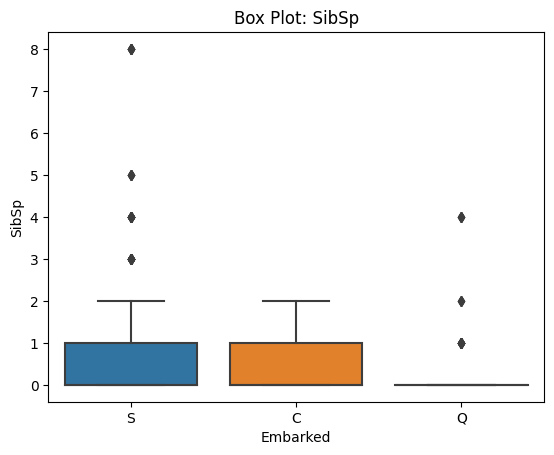

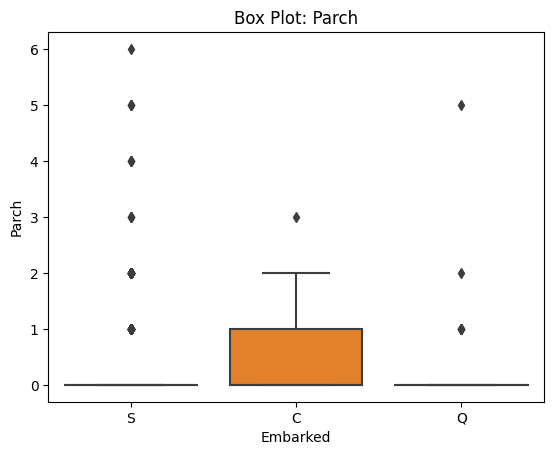

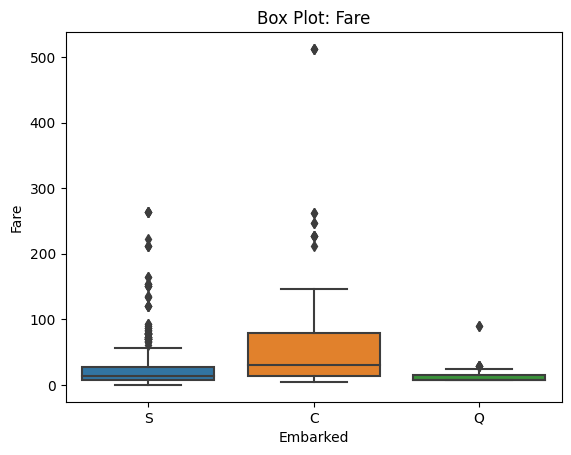

In [14]:
# List to store the non-categorical column names
non_categorical_columns = []

# Iterate over each column in the DataFrame
for column in data.columns:
    # Check if the column is non-categorical (numeric)
    if data[column].dtype != 'object' and column != 'Embarked':
        non_categorical_columns.append(column)

# Create the box plots
for column in non_categorical_columns:
    plt.figure()
    sns.boxplot(x='Embarked', y=column, data=data)
    plt.title(f'Box Plot: {column}')
    plt.show()

# Q8: Data Distribution of different columns

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


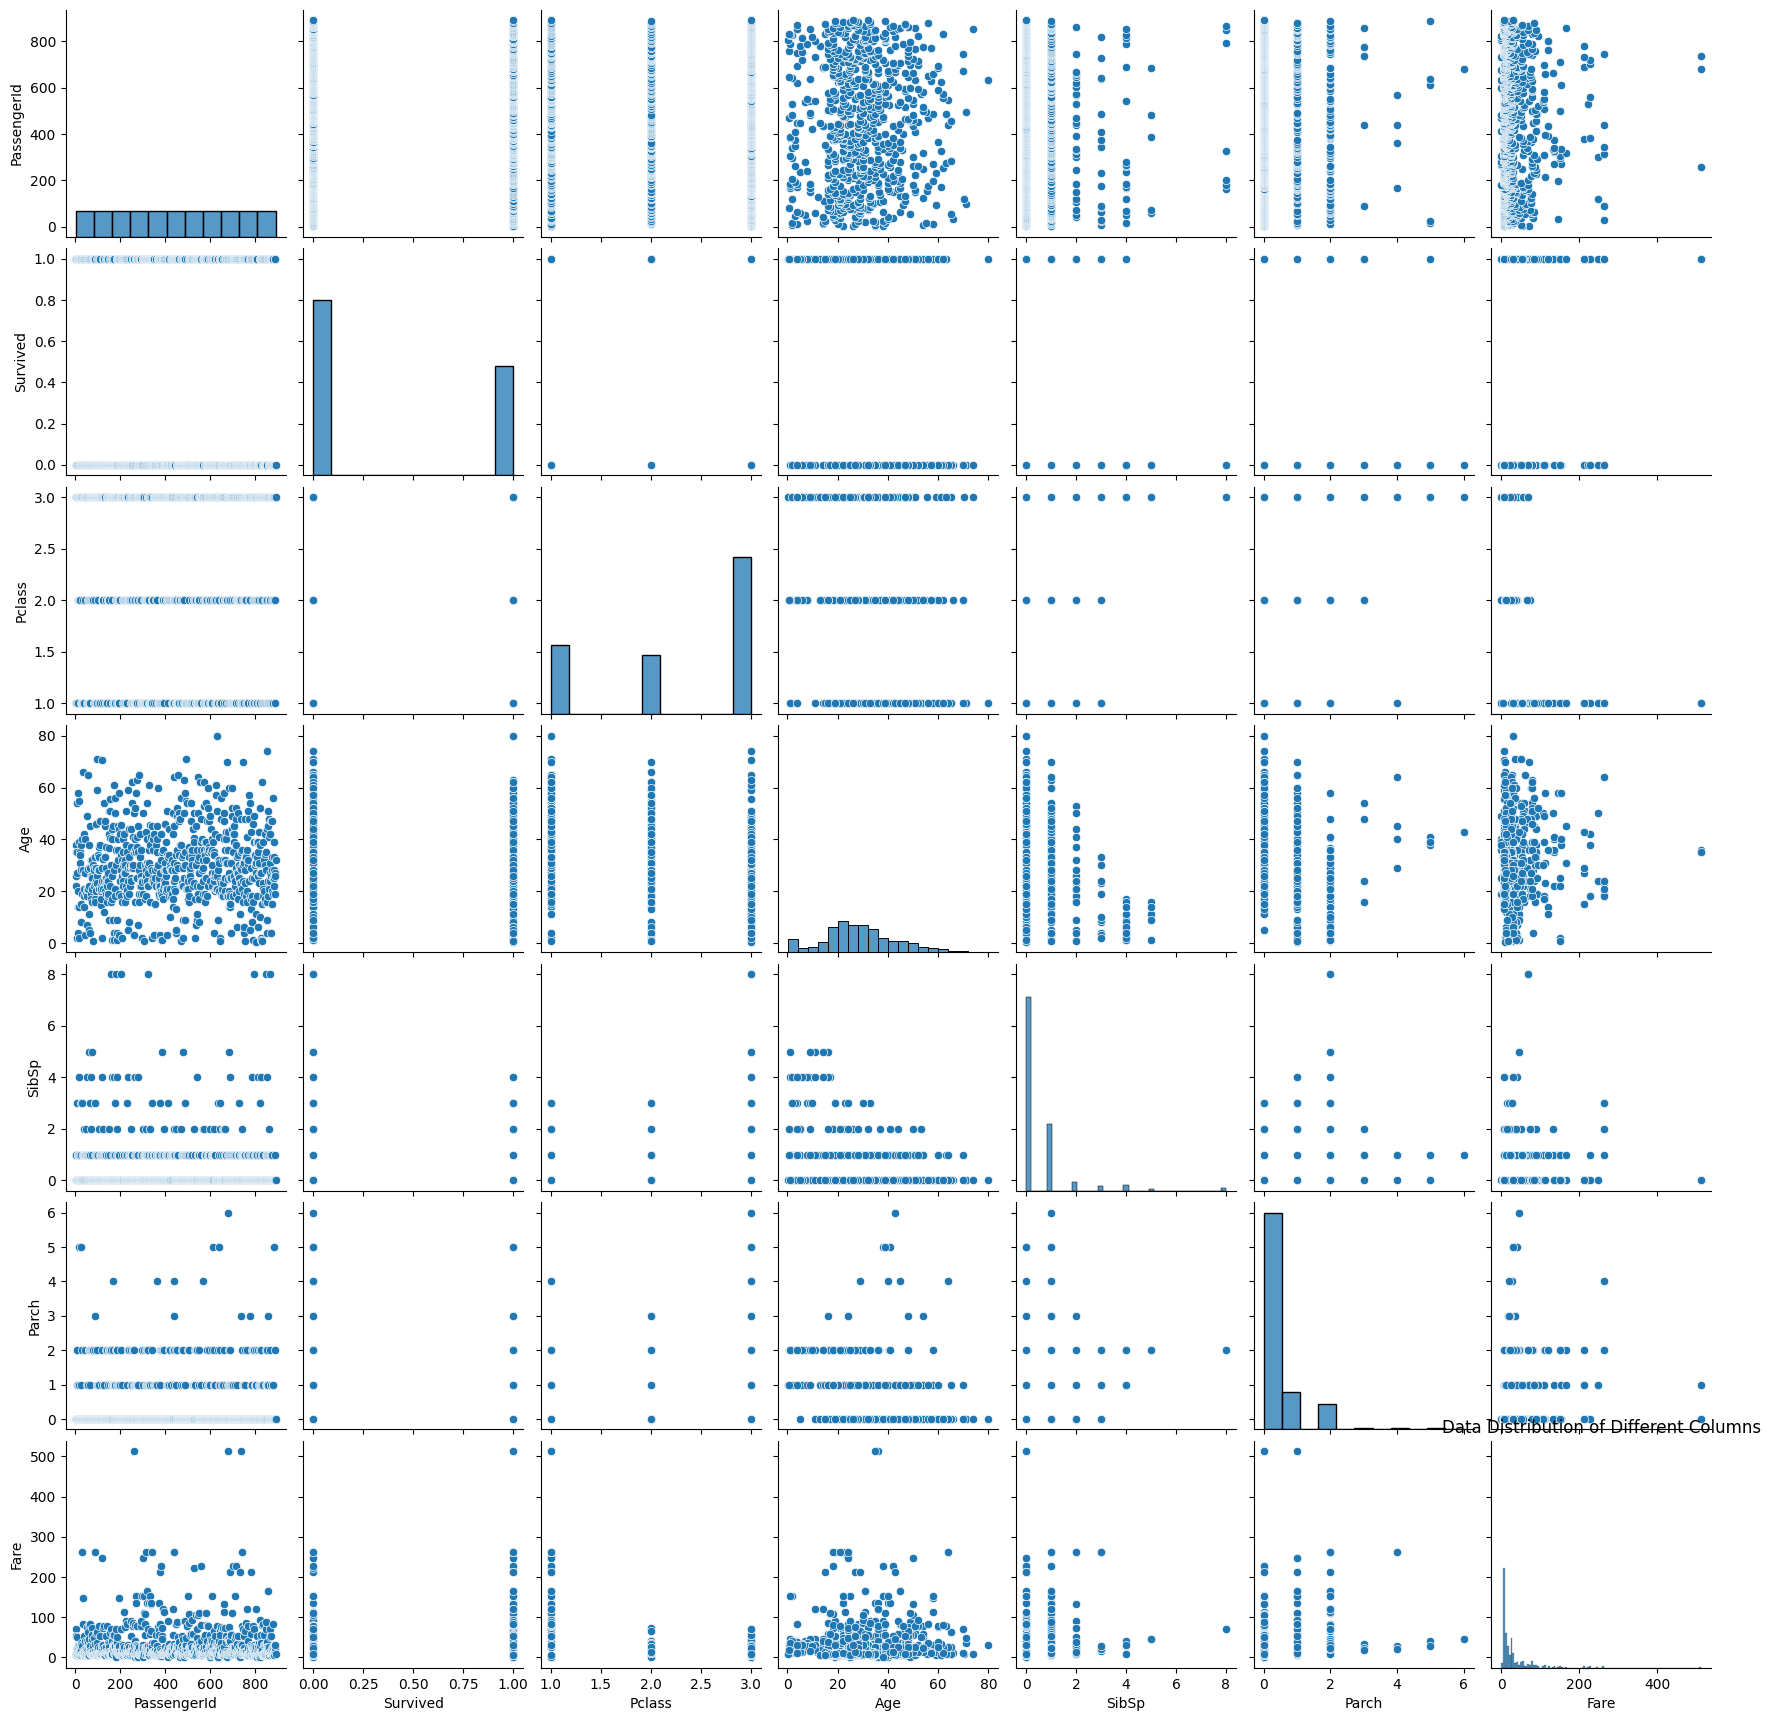

In [15]:
sns.pairplot(data)
plt.title("Data Distribution of Different Columns")
plt.show()

# Q9: Categorical variables in dataset

In [16]:
data_types = data.dtypes

# Identify columns with categorical data types
categorical_columns = data_types[data_types == 'object'].index.tolist()

# 'categorical_columns' now contains the names of columns with categorical data
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


# Q10: Distrbitution of categorical variables

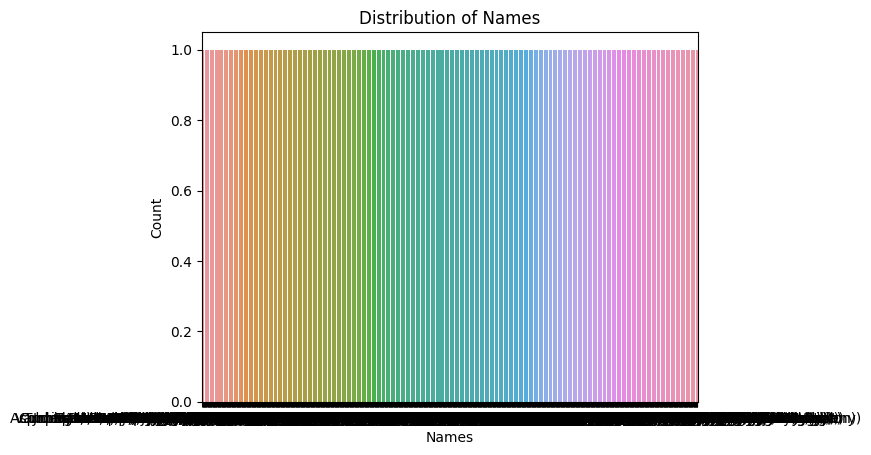

In [23]:
#Distribution of Names:
sns.countplot(x='Name',data= data)
plt.xlabel('Names')
plt.ylabel('Count')
plt.title('Distribution of Names')
plt.show()

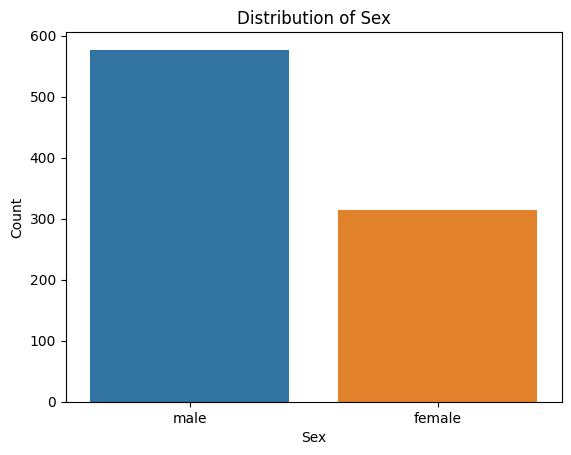

In [24]:
#Distribution of Sex column
sns.countplot(x='Sex',data= data)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

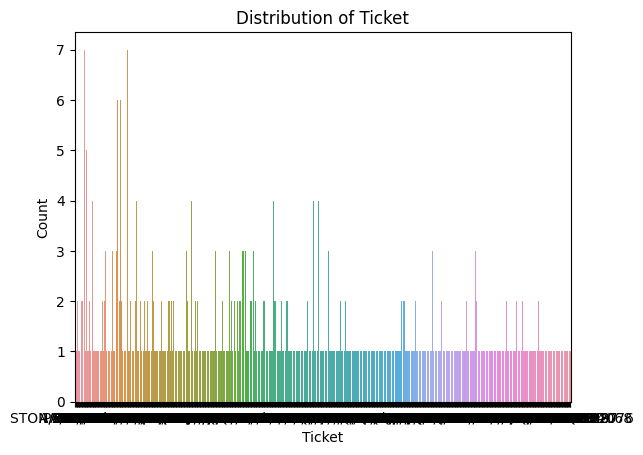

In [25]:
#Distribution of Ticket:
sns.countplot(x='Ticket',data= data)
plt.xlabel('Ticket')
plt.ylabel('Count')
plt.title('Distribution of Ticket')
plt.show()

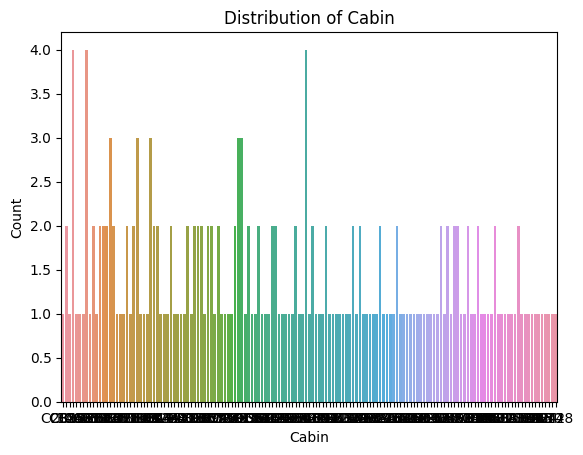

In [26]:
#Distribution of Cabin
sns.countplot(x='Cabin',data= data)
plt.xlabel('Cabin')
plt.ylabel('Count')
plt.title('Distribution of Cabin')
plt.show()

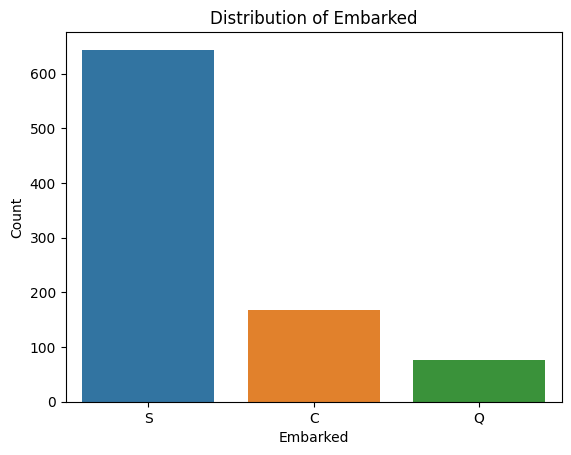

In [27]:
#Distribution of Embarked
sns.countplot(x='Embarked',data= data)
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Distribution of Embarked')
plt.show()

# Q11: Passengers Suvived(1) and died(0)

In [28]:
# Calculate the number of passengers who survived (1) and died (0)
survival_counts = data['Survived'].value_counts()

# Access individual counts
passengers_survived = survival_counts[1]
passengers_died = survival_counts[0]

# Print the results
print("Number of passengers who survived:", passengers_survived)
print("Number of passengers who died:", passengers_died)


Number of passengers who survived: 342
Number of passengers who died: 549


# Q12: Distribution of passenger classes

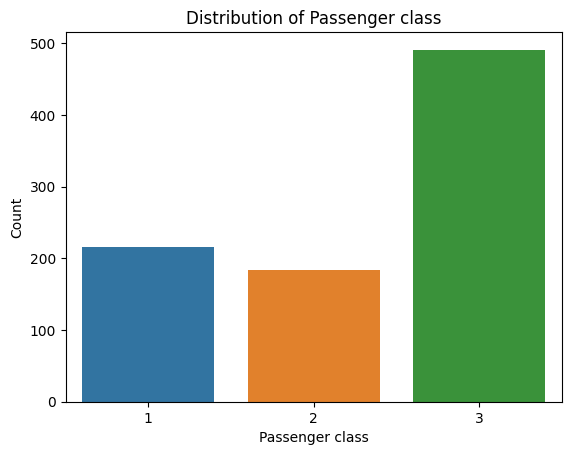

In [29]:
#Distribution of Pclass
sns.countplot(x='Pclass',data= data)
plt.xlabel('Passenger class')
plt.ylabel('Count')
plt.title('Distribution of Passenger class')
plt.show()

# Q13: Distribution of passengers by gender

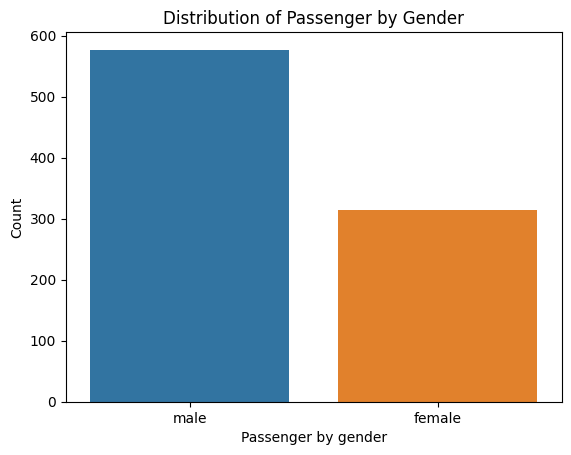

In [30]:
#Distribution of Passenger By sex
sns.countplot(x='Sex',data= data)
plt.xlabel('Passenger by gender')
plt.ylabel('Count')
plt.title('Distribution of Passenger by Gender')
plt.show()

# Q14: Average age of passengers

In [31]:
# Calculate the average age of passengers
average_age = data['Age'].mean()

# Print the result
print("Average age of passengers:", average_age)

Average age of passengers: 29.69911764705882


# Q15: Fare Distribution for each passenger class

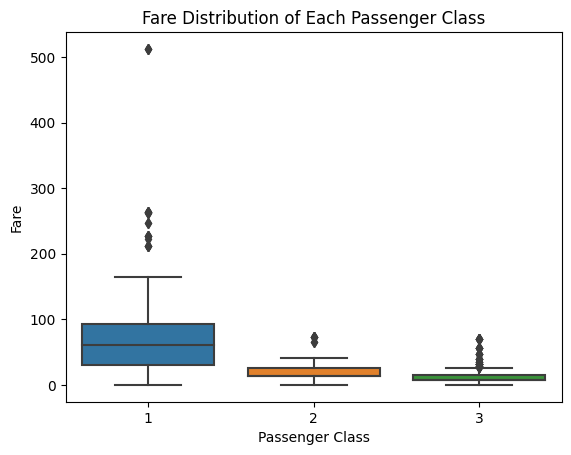

In [32]:
# Create a box plot to show fare distribution for each passenger class
sns.boxplot(x='Pclass', y='Fare', data=data)

# Customize the plot (optional)
plt.title("Fare Distribution of Each Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")

# Show the plot
plt.show()

# Q16: Survival rate based on passenger class

In [33]:
# Calculate the survival rate of passengers based on passenger class
survival_rate_by_class = data.groupby('Pclass')['Survived'].mean()

# Print the result
print(survival_rate_by_class)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


# Q17: Survival rate based on gender

In [34]:
# Calculate the survival rate of passengers based on sex
survival_rate_by_sex = data.groupby('Sex')['Survived'].mean()

# Print the result
print(survival_rate_by_sex)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


# Q18: Distribution of passengers by age and sex

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


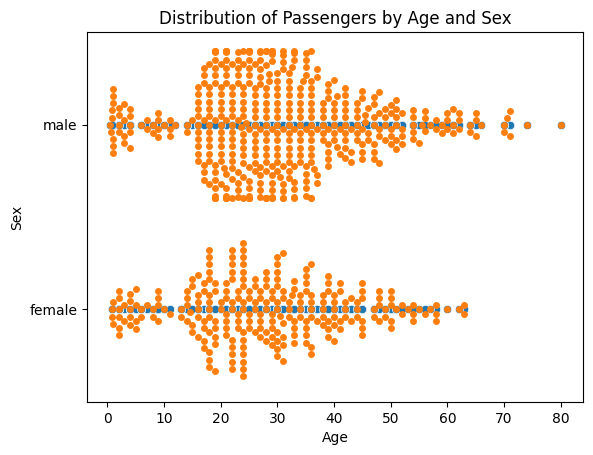

In [35]:
# Create a scatter plot (or swarm plot) to show the distribution of passengers by age and sex
sns.scatterplot(x='Age', y='Sex', data=data)  # For scatter plot
# or
sns.swarmplot(x='Age', y='Sex', data=data)  # For swarm plot

# Customize the plot (optional)
plt.title("Distribution of Passengers by Age and Sex")
plt.xlabel("Age")
plt.ylabel("Sex")

# Show the plot
plt.show()







# Q19: Distribution of passengers by embarkation port

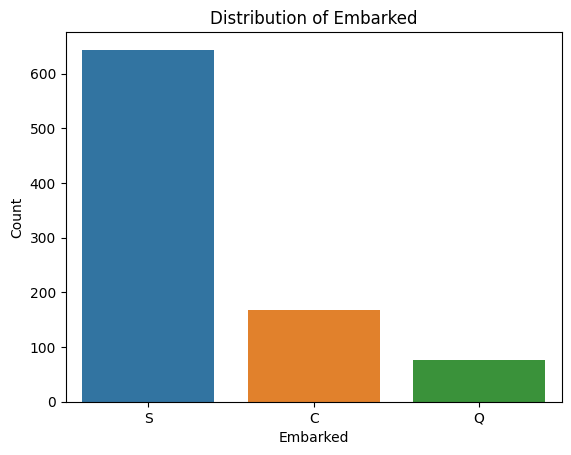

In [38]:
sns.countplot(x='Embarked',data= data)
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Distribution of Embarked')
plt.show()

# Q20: Survival rate based on embarkation port

In [39]:
survival_rate_by_embarked = data.groupby('Embarked')['Survived'].mean()
print(survival_rate_by_embarked)

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


# Q21: Survival rate based on number of sibling/spouse living abroad

In [40]:
survival_rate_by_sibsp = data.groupby('SibSp')['Survived'].mean()
print(survival_rate_by_sibsp)

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


# Q22: Survival rate based on the number of parents/children living abroad

In [41]:
survival_rate_by_parch = data.groupby('Parch')['Survived'].mean()
print(survival_rate_by_parch)

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


# Q23: survival rate based on the combination of Sibsp and parch

In [43]:
survival_rate_by_sibsp_parch = data.groupby(['SibSp', 'Parch'])['Survived'].mean
print(survival_rate_by_sibsp_parch)

<bound method GroupBy.mean of <pandas.core.groupby.generic.SeriesGroupBy object at 0x00000172037889A0>>


# Q24: distribution of fare paid by passengers

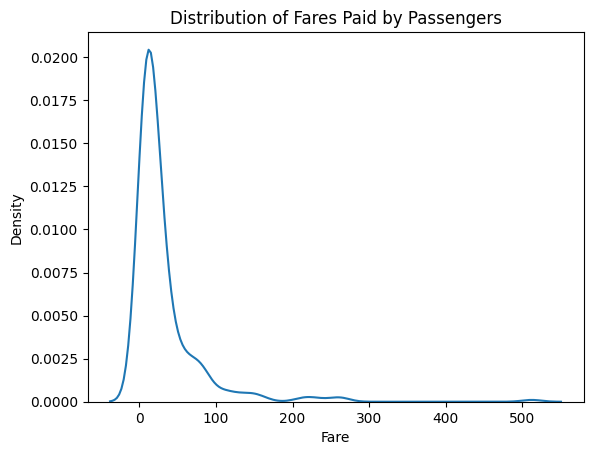

In [44]:
sns.kdeplot(data['Fare'])
plt.title("Distribution of Fares Paid by Passengers")
plt.xlabel("Fare")
plt.ylabel("Density")
plt.show()

# Q25: average fare paid by passengers who survived and those who did not

In [45]:
average_fare_survived = data[data['Survived'] == 1]['Fare'].mean()
average_fare_not_survived = data[data['Survived'] == 0]['Fare'].mean()
print("Average Fare Paid by Passengers Who Survived:", average_fare_survived)
print("Average Fare Paid by Passengers Who Did Not Survive:", average_fare_not_survived)

Average Fare Paid by Passengers Who Survived: 48.39540760233918
Average Fare Paid by Passengers Who Did Not Survive: 22.117886885245902


# Q26: survival rate based on the cabin class (if available)

In [46]:
survival_rate_by_cabin = data.groupby('Cabin')['Survived'].mean()
print(survival_rate_by_cabin)

Cabin
A10    0.0
A14    0.0
A16    1.0
A19    0.0
A20    1.0
      ... 
F33    1.0
F38    0.0
F4     1.0
G6     0.5
T      0.0
Name: Survived, Length: 147, dtype: float64


# Q27: survival rate based on whether the passenger had a cabin or not

In [47]:
data['HasCabin'] = data['Cabin'].notnull()
survival_rate_by_has_cabin = data.groupby('HasCabin')['Survived'].mean()
print(survival_rate_by_has_cabin)

HasCabin
False    0.299854
True     0.666667
Name: Survived, dtype: float64
